## PART-3(RECOGNITION USING PYTESSERACT)

#### 1. Importing required libraries

In [1]:
import pytesseract 
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import cv2 
import glob 
import os

#### 2. Attaching the tesseract execution file

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#### 3. Creating the model which will recognize the license plates

In [3]:
def ocr_model(x):
    img = Image.open(x)
    text = pytesseract.image_to_string(img, lang='eng', config='-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    print(text)

In [36]:
# importing the module 
import cv2 

# function to display the coordinates of 
# of the points clicked on the image 
def click_event(event, x, y, flags, params): 

	# checking for left mouse clicks 
	if event == cv2.EVENT_LBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font, 
					1, (255, 0, 0), 2) 
		cv2.imshow('image', img) 

	# checking for right mouse clicks	 
	if event==cv2.EVENT_RBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
		b = img[y, x, 0] 
		g = img[y, x, 1] 
		r = img[y, x, 2] 
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r), 
					(x,y), font, 1, 
					(255, 255, 0), 2) 
		cv2.imshow('image', img) 

# driver function 
if __name__=="__main__": 

	# reading the image 
	img = cv2.imread('demo.jpg', 1) 

	# displaying the image 
	cv2.imshow('image', img) 

	# setting mouse hadler for the image 
	# and calling the click_event() function 
	cv2.setMouseCallback('image', click_event) 

	# wait for a key to be pressed to exit 
	cv2.waitKey(0) 

	# close the window 
	cv2.destroyAllWindows() 

246   15
245   34
173   16
173   34


In [37]:
# import the necessary packages
import numpy as np
import cv2
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

In [38]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [39]:
import numpy as np
image = cv2.imread("demo.jpg")
pts = np.float32([[246,15], [245,34], [173,16], [173,34]])

In [40]:
warped = four_point_transform(image, pts)
cv2.imshow("Original", image)
cv2.imshow("Warped", warped)
cv2.waitKey(0)

-1

In [41]:
cv2.imwrite("cut4.jpg", warped) 

True

In [42]:
img = cv2.imread('cut4.jpg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 350 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (19, 73, 3)
Resized Dimensions :  (66, 255, 3)


In [43]:
cv2.imwrite("cut4_resized.jpg", resized) 

True

**IMAGE-1**

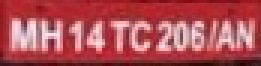

In [18]:
from IPython.display import Image
Image('cut1_resized.jpg')

**READING-1**

In [19]:
from PIL import Image
ocr_model('cut1_resized.jpg')

MH 14 TC 206/AN


**IMAGE-2**

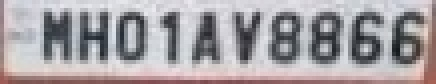

In [32]:
from IPython.display import Image
Image('cut2_resized.jpg')

**READING-2**

In [33]:
from PIL import Image
ocr_model('cut2_resized.jpg')

MHO1AVS866


**IMAGE-3**

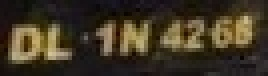

In [34]:
from IPython.display import Image
Image('cut3_resized.jpg')

**READING-3**

In [35]:
from PIL import Image
ocr_model('cut3_resized.jpg')

DL iN 4268


**IMAGE-4**

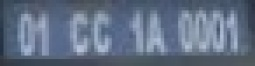

In [44]:
from IPython.display import Image
Image('cut4_resized.jpg')

**READING-4**

In [45]:
from PIL import Image
ocr_model('cut4_resized.jpg')

#### 4. Creating lists containing actual license plate and detected license plate names respectively

In [46]:
actual_license_plates = []
for x in glob.glob(r"C:\Users\Hp\Desktop\Others\anpr_ocr\test\img\\*.png"):
    y = x.split("\\")[-1].split(".")[0]
    actual_license_plates.append(y)

In [47]:
predicted_license_plates = []
for x in glob.glob(r"C:\Users\Hp\Desktop\Others\anpr_ocr\test\img\*.png"):
    img = Image.open(x)
    text = pytesseract.image_to_string(img, lang='eng', config='-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    predicted_license_plates.append(text)

#### 5. Actual vs Predicted

In [48]:
print("Actual License Plate", "\t", "Predicted License Plate", "\t") 
print("--------------------", "\t", "-----------------------", "\t") 

def calculate_predicted_accuracy(actual_list, predicted_list): 
    for actual_plate, predict_plate in zip(actual_list, predicted_list): 
        accuracy = "0 %"
        num_matches = 0
        if actual_plate == predict_plate: 
            accuracy = "100 %"
        else: 
            if len(actual_plate) == len(predict_plate): 
                for a, p in zip(actual_plate, predict_plate): 
                    if a == p: 
                        num_matches += 1
                accuracy = str(round((num_matches / len(actual_plate)), 2) * 100) 
                accuracy += "%"
        print("	 ", actual_plate, "\t\t\t", predict_plate, "\t\t ") 


calculate_predicted_accuracy(actual_license_plates, predicted_license_plates)

Actual License Plate 	 Predicted License Plate 	
-------------------- 	 ----------------------- 	
	  A007HA50 			 A O07 HA |.20: 		 
	  A036CT78 			 | AO36cT |.28: 		 
	  A065CA30 			 !A065CA|.30: 		 
	  A083YA10 			 | AOB3YA|.10; 		 
	  A128HB61 			 | A128 HB |S: 		 
	  A141AP01 			 | A141 AP |.01; 		 
	  A160HE95 			 | A160 HE |.25: 		 
	  A183KE05 			 | AAB3KE|.05: 		 
	  A225EP73 			 | A225eP |.23; 		 
	  A252EM35 			 /A 252EM |.3° 		 
	  A287KH73 			 | A287 KH|.23; 		 
	  A301YA75 			 | AZO1YA|.25: 		 
	  A332OE27 			 | M3320 |.27; 		 
	  A401OC76 			 A 4010C|.26: 		 
	  A441OB61 			 A 4410B].61 		 
	  A468KC45 			 | A 468KC|.49: 		 
	  A531PY62 			 | AS31Py 62: 		 
	  A532CO63 			 /A532co|,63; 		 
	  A542KO70 			 |! AS42Ko|.20: 		 
	  A544XE91 			 A544 XE |,21; 		 
	  A621YH10 			 | A621 YH|.10; 		 
	  A634XY01 			 /A634 xy [01 		 
	  A642CO89 			 /A642.c0|,82; 		 
	  A673OC70 			 |! A6730C|.20; 		 
	  A674YH33 			 | A674 YH |S: 		 
	  A717PE67 			 | A717 PE|S7: 		 
	  A764YP92 	